In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230406121024819500'

In [19]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data

--2023-04-06 10:11:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209266 (204K) [application/x-httpd-php]
Saving to: ‘cloud.data.1’

cloud.data.1        100%[===================>] 204.36K   137KB/s    in 1.5s    

2023-04-06 10:11:04 (137 KB/s) - ‘cloud.data.1’ saved [209266/209266]



In [36]:
import numpy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.ndimage import gaussian_filter
import time
import matplotlib.pyplot

In [2]:
cloud = []
with open("/home/ahmed/Projects/Vanilla/Scikit-Learn/cloud.data",'r') as rawData:
    for aline in rawData:
        aline = aline.strip().split()
        try:
            l = list(map(float,aline))
            if l:
                cloud.append(l)
        except:
            pass

In [3]:
# convert the dataset into numpy array
dataset = numpy.array(cloud)

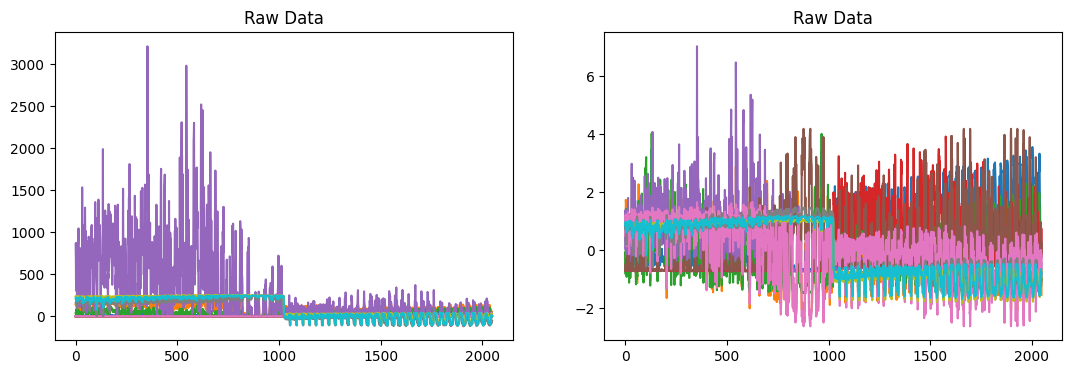

In [4]:
prototype = numpy.zeros(dataset.shape)

for coli in range(dataset.shape[1]):
    mean = numpy.mean(dataset[:,coli])
    stf = numpy.std(dataset[:,coli],ddof=1)
    prototype[:,coli] = (dataset[:,coli]-mean)/stf
    
fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(13,4))

ax[0].plot(dataset)
ax[0].set_title('Raw Data')


ax[1].plot(prototype)
ax[1].set_title('Raw Data')

matplotlib.pyplot.show()

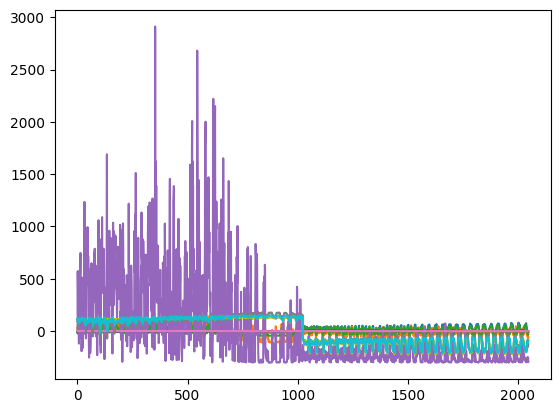

In [5]:
dataset_demean = dataset - dataset.mean(axis=0)
matplotlib.pyplot.plot(dataset_demean);

In [6]:
cov_features = dataset_demean.T @ dataset_demean / dataset_demean.shape[1]-1
cov_featurez = prototype.T @ prototype / (prototype.shape[1]-1)

In [7]:
cov_features.shape

(10, 10)

In [8]:
cov_observation = dataset_demean @ dataset_demean.T / dataset_demean.shape[0]-1
cov_observationz = prototype @ prototype.T / (prototype.shape[0]-1)

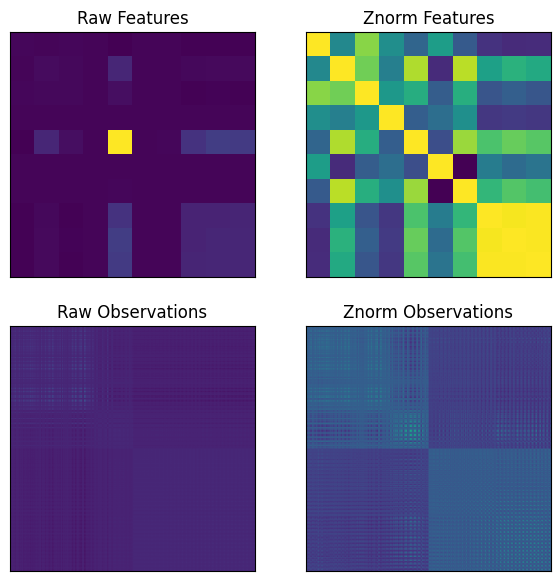

In [9]:
fig,ax = matplotlib.pyplot.subplots(2,2,figsize=(7,7))

ax[0,0].imshow(cov_features)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,0].set_title("Raw Features")

ax[0,1].imshow(cov_featurez)
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_title("Znorm Features")

ax[1,0].imshow(cov_observation)
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,0].set_title("Raw Observations")

ax[1,1].imshow(cov_observationz)
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,1].set_title("Znorm Observations")

matplotlib.pyplot.show()

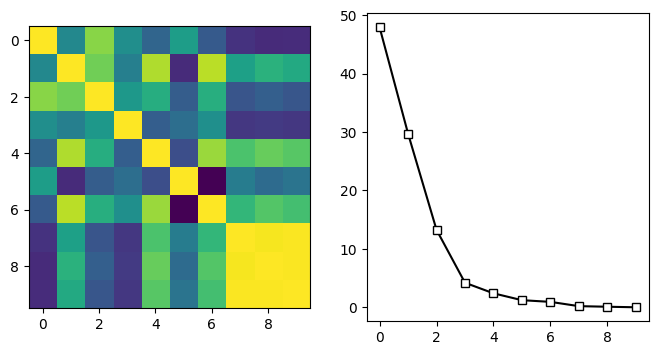

In [10]:
pca = PCA().fit(prototype)

fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(8,4))

ax[0].imshow(pca.get_covariance())

ax[1].plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor='white')

matplotlib.pyplot.show()

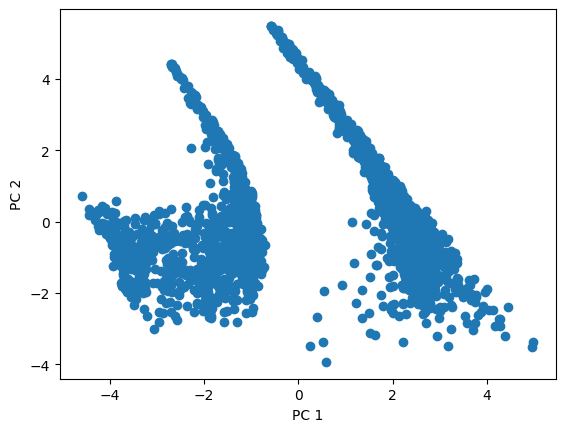

In [11]:
# projecting the data through 2 PCs

prototype2D = pca.transform(prototype)

matplotlib.pyplot.plot(prototype2D[:,0],prototype2D[:,1],'o')
matplotlib.pyplot.xlabel('PC 1')
matplotlib.pyplot.ylabel('PC 2')
matplotlib.pyplot.show()

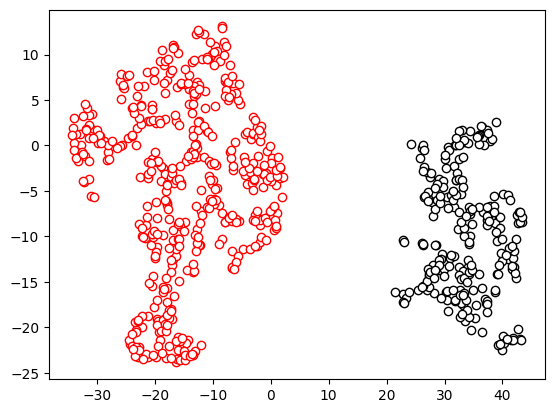

In [21]:
t = TSNE().fit_transform(prototype)


#k-means 
clusters = KMeans(n_init=2).fit(t)

matplotlib.pyplot.plot(t[clusters.labels_==0,0],t[clusters.labels_==0,1],'ro',markerfacecolor='w')
matplotlib.pyplot.plot(t[clusters.labels_==1,0],t[clusters.labels_==1,1],'ko',markerfacecolor='w')
matplotlib.pyplot.show()

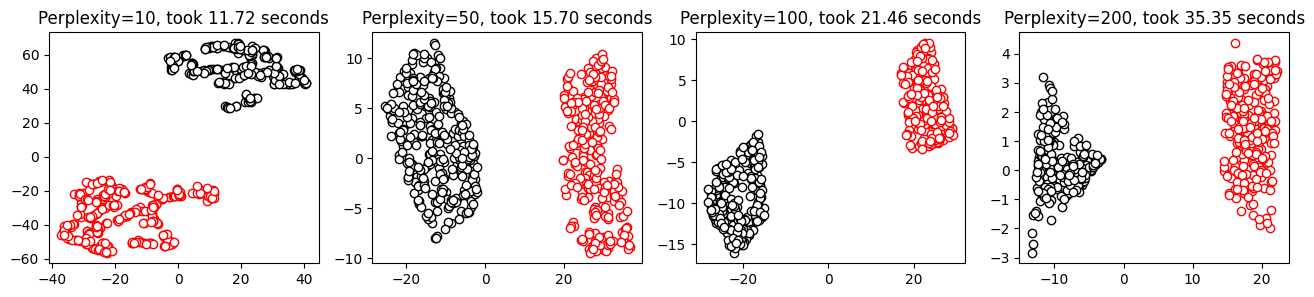

In [29]:
perps = [10,50,100,200]

fig,ax = matplotlib.pyplot.subplots(1,4,figsize=(16,3))
for i in range(4):
    # timer
    start = time.time()
    t = TSNE(perplexity=perps[i]).fit_transform(prototype)
    clusters = KMeans(n_init=2).fit(t)
    end = time.time()-start
    ax[i].plot(t[clusters.labels_==0,0],t[clusters.labels_==0,1],'ro',markerfacecolor='w')
    ax[i].plot(t[clusters.labels_==1,0],t[clusters.labels_==1,1],'ko',markerfacecolor='w')
    ax[i].set_title(f'Perplexity={perps[i]}, took {end:.2f} seconds')

In [32]:
# re-run decomposition
t = TSNE(perplexity=10).fit_transform(prototype)

trange= numpy.arange(-100,100)

timage = numpy.zeros((len(trange),len(trange)))

# map the spare coordinates onto the dense matrix

for i in range(len(t)):
    xi = numpy.argmin((t[i,0]-trange)**2)
    yi = numpy.argmin((t[i,1]-trange)**2)    
    timage[xi,yi]+=1

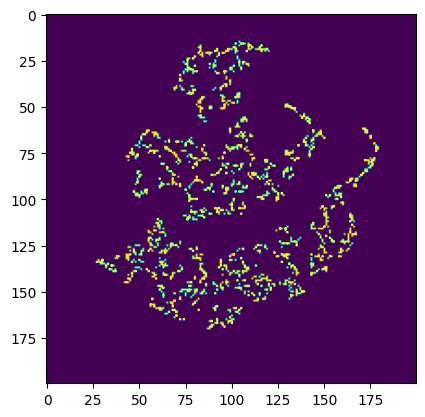

In [35]:
matplotlib.pyplot.imshow(timage,vmin=0,vmax=1,origin='upper')

matplotlib.pyplot.show()

In [39]:
timage_smooth = gaussian_filter(timage,sigma=(3,3))

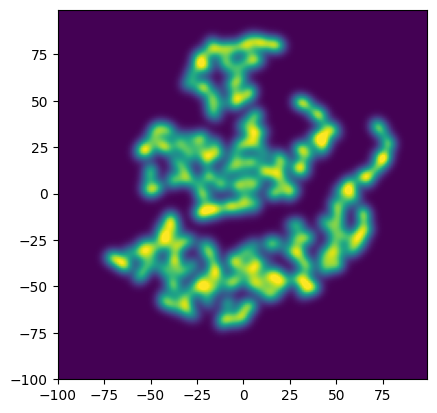

In [42]:
matplotlib.pyplot.imshow(timage_smooth,vmin=0,vmax=.3,origin='upper',extent=[trange[0],trange[-1],trange[0],trange[-1]])
matplotlib.pyplot.show()